# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
app_train[(app_train['CNT_CHILDREN']>2) & (app_train['CNT_CHILDREN']<6)].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,4230.000000,4230.000000,4230.000000,4.230000e+03,4.230000e+03,4230.000000,4.222000e+03,4230.000000,4230.000000,4230.000000,...,4230.000000,4230.000000,4230.000000,4230.0,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,275018.506147,0.099291,3.141135,1.736263e+05,6.082194e+05,28124.648936,5.440113e+05,0.019581,-13669.464066,6947.158629,...,0.007092,0.000473,0.000473,0.0,0.004879,0.005693,0.029818,0.203036,0.251017,1.832204
std,102868.424282,0.299087,0.401211,1.129300e+05,3.992876e+05,15451.248622,3.651238e+05,0.013543,2116.072290,57477.637221,...,0.083926,0.021742,0.021742,0.0,0.073479,0.085373,0.173268,0.696467,0.599973,1.779396
min,100108.000000,0.000000,3.000000,2.925000e+04,4.500000e+04,2979.000000,4.500000e+04,0.000533,-24743.000000,-13684.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,184609.750000,0.000000,3.000000,1.125000e+05,2.814930e+05,17302.500000,2.475000e+05,0.008866,-14733.500000,-3127.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,274259.000000,0.000000,3.000000,1.485000e+05,5.212800e+05,26154.000000,4.500000e+05,0.018717,-13483.000000,-1725.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,363994.250000,0.000000,3.000000,2.025000e+05,8.244922e+05,35755.875000,6.885000e+05,0.026392,-12274.750000,-784.750000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456245.000000,1.000000,5.000000,2.250000e+06,2.695500e+06,225000.000000,2.254500e+06,0.072508,-7807.000000,365243.000000,...,1.000000,1.000000,1.000000,0.0,2.000000,2.000000,2.000000,16.000000,8.000000,10.000000


In [5]:
## 1
"""
Your code here
"""
cut_rule = [-1, 0, 2, 5, 100]
group_names = ['0', '1-2', '3-5', '6+']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=group_names)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1-2     87868
3-5      4230
6+         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
# grouped_df.size()
# grouped_df.get_group('6+')
grouped_df.mean()
# grouped_df.size()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1-2                 0         174590.584401
                    1         176115.362720
3-5                 0         175053.742913
                    1         160677.385714
6+                  0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

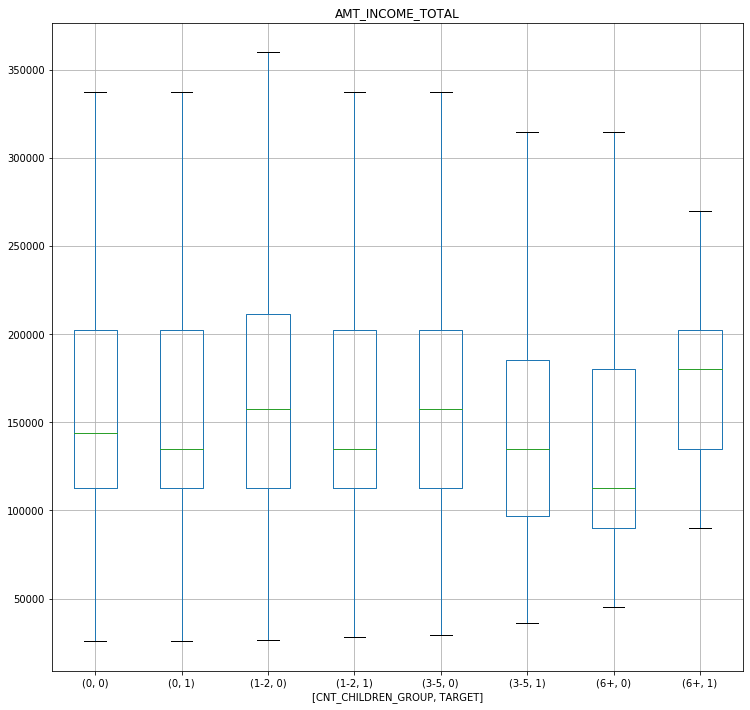

In [7]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [10]:
#3
"""
Your code here
"""
# grouped_df.get_group('0')
# print(len(grouped_df))
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())
print(app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head())

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-np.mean(x))/np.std(x))
# app_train
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

   AMT_INCOME_TOTAL  AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0          202500.0                                   0.491521
1          270000.0                                   0.972434
2           67500.0                                  -0.934706
3          135000.0                                  -0.298993
4          121500.0                                  -0.426135


,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
